#  Ordinary Differential Equations Algorithms

### Packages and Configurations 

In [20]:
include("DiffSolving.jl")
using Plots, LaTeXStrings
cd(dirname(@__FILE__))

## First Order ODE

### RC Circuit

##### *Comparison Between Euler Method and Numerical Solution*

In [7]:
rc=1.0; tₘᵢₙ=0.0; tₘₐₓ=5.0; h=0.01; q₀=1.0
t_range, Q=DiffSolving.EulerMethod((t,x)->(q₀ .- x )/rc, [0.0], tₘᵢₙ, tₘₐₓ, h)
plot(t_range, Q,label="Euler Method",ylabel=L"Q(t)",xlabel="t(s)",title=L"\Delta t=0.01s", dpi=400, color=:orchid4, linewidth=3)
plot!(t -> q₀ *(1 - exp(-t/rc)), label="Numerical Solution", linewidth=3, color=:pink1, linestyle=:dash, legend=:bottomright)
savefig("../../computational_physics/PSet9/Figs/Euler_compare.pdf")

##### *Error Plot*

In [25]:
step_list=collect(range(0.01, 1, length=100))
Error_list=[]
for h in step_list
    t_range, Q=DiffSolving.EulerMethod((t,x)->(q₀ .- x )/rc, xᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, h)
    push!(Error_list, abs(sum(Q .- q₀ .*(1 .- exp.(-t_range ./rc)))))
end
plot(step_list, Error_list, ylabel=L"Error", xlabel=L"Step\ Size",
     title=L"Error\ of\ the\ Euler\ Method's\ Solution\ for\ different\ Steps",lw=2, color=:darkorange,dpi=400, legend=false)
savefig("../../computational_physics/PSet9/Figs/Euler_Error.pdf")


##### *Instability for the Given Algorithm*

In [63]:
t_range, Q=DiffSolving.InstableAlgorithm((t,x)->(q₀ .- x )/rc, xᵢₙᵢₜ, tₘᵢₙ, tₘₐₓ, 0.08)
plot(t_range, Q, color=:darkgoldenrod2, dpi=400, label="Instable Solution", xlabel=L"t/RC", ylabel=L"Q(t)")
plot!(t -> q₀ *(1 - exp(-t/rc)), label="Numerical Solution", linewidth=2, color=:brown4, linestyle=:dash, legend=:bottomright)
savefig("../../computational_physics/PSet9/Figs/Instability.pdf")

## Second Order ODE

### Simple Harmonic Oscillator 

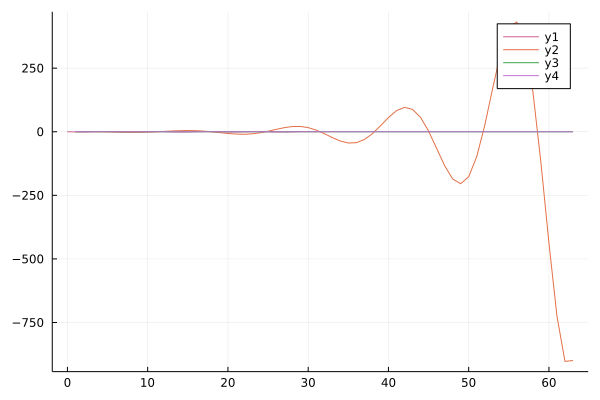

In [31]:
xᵢₙᵢₜ , vᵢₙᵢₜ= 1.0, 0.0; step=0.1;  n=5; tₘᵢₙ=0.0; tₘₐₓ=round(2*π*n); h=0.5
x_plot = plot(cos, tₘᵢₙ, tₘₐₓ, color=:cadetblue4)
v_plot = plot(t -> -sin(t), tₘᵢₙ, tₘₐₓ, color=:hotpink3)

t_range, x, v = DiffSolving.EulerCromer((t,x)-> -x, 0.0, 1.0, tₘᵢₙ, tₘₐₓ, h)
plot!(x_plot, x )
plot!(v_plot, v)
t_range, x, v = DiffSolving.Verlet((t,x)-> -x, 0.0, 1.0, tₘᵢₙ, tₘₐₓ, h)
plot!(x_plot, x )
plot!(v_plot, v)
t_range, x , v= DiffSolving.VelocityVerlet((t,x)-> -x, 0.0, 1.0, tₘᵢₙ, tₘₐₓ, h)
plot!(x_plot, x )
plot!(v_plot, v)